<a href="https://colab.research.google.com/github/Prajyoti20/DeepLerning/blob/main/Regression_Keras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Regreetion With Keras**

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### step 1: Read the data

In [2]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv")
df.head(5)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [3]:
df.shape

(9568, 5)

# **Step2 : Perform Your basic quality cheaks**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [7]:
df.duplicated().sum()

41

In [8]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [9]:
df=df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


Seperate X and Y(PE)

In [10]:
X=df.drop(columns=['PE'])
Y=df[['PE']]

In [11]:
X.head(5)

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [12]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


Preprocess using x pipeline

In [13]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                             ('scale',StandardScaler())]).set_output(transform='pandas')

In [16]:
X_pre = num_pipe.fit_transform(X)

In [17]:
X_pre

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837
...,...,...,...,...
9563,-0.609648,-0.423583,-0.241925,-0.027724
9564,1.847362,1.864831,-0.494441,-0.932100
9565,-0.492776,-0.863450,0.162101,0.364561
9566,-0.269777,0.439598,0.899448,1.459261


# **Apply train test Split**

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [19]:
x_train

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499
...,...,...,...,...
5742,-0.109917,-1.064465,-1.356363,1.309330
5197,1.477937,1.535325,-1.701468,0.325538
5396,0.017702,-0.244640,-0.752007,1.464053
860,0.949996,1.146696,-0.418686,-0.445339


In [20]:
y_train

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71
...,...
5742,459.96
5197,430.00
5396,447.96
860,440.45


In [21]:
x_test

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599
...,...,...,...,...
3403,-2.138395,-1.505909,0.899448,1.746114
4214,0.240700,1.233408,-0.460772,0.604861
7085,0.962086,1.638591,-1.230104,-0.857477
2215,1.433606,1.266517,-1.097113,-0.207093


In [22]:
y_test

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47
...,...
3403,490.50
4214,443.31
7085,441.14
2215,438.47


In [23]:
x_test.shape

(1906, 4)

In [24]:
x_train.shape

(7621, 4)

In [25]:
x_train.shape[1]

4

**Step5: Build the neural network**

In [26]:
from keras.models import Sequential
from keras.layers import Dense,Input

In [27]:
#Initialize the model
model=Sequential()

#Add input layer
model.add(Input(shape=(x_train.shape[1],)))
#Add dense hidden layer 1
model.add(Dense(16,activation='relu'))
#Add dense hidden layer 2
model.add(Dense(8,activation='relu'))

# Add output layer
model.add(Dense(1,activation='linear'))



In [28]:
#Compile the model
model.compile(loss="mse",metrics=["mae"],optimizer="adam")

In [29]:
hist=model.fit(x_train,y_train,
          validation_data=(x_test,y_test),
          epochs=60)

Epoch 1/60
239/239 [==============================] - 4s 7ms/step - loss: 204487.6406 - mae: 451.8604 - val_loss: 198726.6875 - val_mae: 445.3842
Epoch 2/60
239/239 [==============================] - 1s 6ms/step - loss: 178471.2031 - mae: 421.3332 - val_loss: 146415.8438 - val_mae: 381.0500
Epoch 3/60
239/239 [==============================] - 2s 7ms/step - loss: 102435.9062 - mae: 311.0009 - val_loss: 58804.5820 - val_mae: 227.6924
Epoch 4/60
239/239 [==============================] - 2s 10ms/step - loss: 37301.4609 - mae: 170.0229 - val_loss: 23327.4238 - val_mae: 129.7728
Epoch 5/60
239/239 [==============================] - 3s 12ms/step - loss: 20190.3262 - mae: 121.5870 - val_loss: 16585.4766 - val_mae: 110.3511
Epoch 6/60
239/239 [==============================] - 2s 8ms/step - loss: 14704.6787 - mae: 103.7965 - val_loss: 11989.3457 - val_mae: 93.6423
Epoch 7/60
239/239 [==============================] - 3s 11ms/step - loss: 10274.4033 - mae: 86.3489 - val_loss: 8044.9956 - val_m

In [30]:
hist.history["loss"]

[204487.640625,
 178471.203125,
 102435.90625,
 37301.4609375,
 20190.326171875,
 14704.6787109375,
 10274.4033203125,
 6669.17041015625,
 4050.15771484375,
 2358.318359375,
 1371.9300537109375,
 828.1220092773438,
 533.2638549804688,
 367.3182067871094,
 267.8593444824219,
 203.44190979003906,
 158.32505798339844,
 126.54370880126953,
 103.32966613769531,
 85.71882629394531,
 72.52980041503906,
 62.125160217285156,
 54.22145462036133,
 47.5040397644043,
 42.35400390625,
 37.93952178955078,
 34.27876281738281,
 31.31184959411621,
 28.761741638183594,
 26.682209014892578,
 25.19099235534668,
 23.983285903930664,
 23.073772430419922,
 22.448772430419922,
 21.895132064819336,
 21.443885803222656,
 21.07551383972168,
 20.795318603515625,
 20.82461929321289,
 20.39752960205078,
 20.38459014892578,
 20.24593162536621,
 20.313661575317383,
 20.272401809692383,
 20.303922653198242,
 20.06451416015625,
 20.025121688842773,
 20.089780807495117,
 19.961627960205078,
 19.98506736755371,
 19.922809

In [31]:
hist.history["val_loss"]

[198726.6875,
 146415.84375,
 58804.58203125,
 23327.423828125,
 16585.4765625,
 11989.345703125,
 8044.99560546875,
 5015.60009765625,
 2947.0654296875,
 1686.7259521484375,
 978.3689575195312,
 610.8845825195312,
 404.32672119140625,
 289.9772644042969,
 216.83262634277344,
 168.22438049316406,
 134.7927703857422,
 109.2413558959961,
 91.55632781982422,
 77.07417297363281,
 65.87373352050781,
 57.363155364990234,
 50.778263092041016,
 44.856590270996094,
 39.768272399902344,
 36.297542572021484,
 32.98963928222656,
 29.90458869934082,
 27.815631866455078,
 26.110017776489258,
 24.401538848876953,
 23.290241241455078,
 22.489580154418945,
 23.137500762939453,
 21.598508834838867,
 21.0158634185791,
 20.73959732055664,
 20.636613845825195,
 20.351694107055664,
 20.433149337768555,
 20.04034423828125,
 20.876482009887695,
 19.785446166992188,
 19.7655086517334,
 19.854469299316406,
 20.040485382080078,
 20.143239974975586,
 19.824604034423828,
 19.673255920410156,
 19.623640060424805,
 

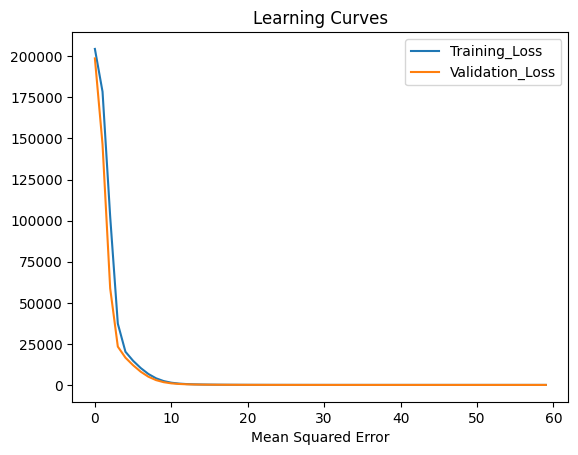

In [32]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"],label="Training_Loss")
plt.plot(hist.history["val_loss"],label="Validation_Loss")
plt.xlabel("Number of Epochas")
plt.xlabel("Mean Squared Error")
plt.title("Learning Curves")
plt.legend()
plt.show()

In [33]:
model.evaluate(x_train,y_train)

239/239 [==============================] - 0s 1ms/step - loss: 19.6423 - mae: 3.5040


[19.642349243164062, 3.5039756298065186]

In [34]:
model.evaluate(x_test,y_test)

60/60 [==============================] - 0s 1ms/step - loss: 19.7708 - mae: 3.5341


[19.770767211914062, 3.534104585647583]

In [35]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

60/60 [==============================] - 0s 1ms/step


In [36]:
y_pred_train

array([[450.68967],
       [477.20782],
       [467.47058],
       ...,
       [450.33383],
       [436.97403],
       [453.0906 ]], dtype=float32)

In [37]:
y_train

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71
...,...
5742,459.96
5197,430.00
5396,447.96
860,440.45


In [38]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.9316609573281045

In [39]:
r2_score(y_test,y_pred_test)

0.9344882670827671

In [53]:
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
Xnew= pd.read_csv(url)
Xnew

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97
...,...,...,...,...
95,26.35,69.48,1008.45,70.47
96,11.78,39.96,1011.37,82.95
97,5.62,41.38,1020.91,86.21
98,24.96,74.99,1008.25,80.52


In [54]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [58]:
Xnew_pre = num_pipe.fit_transform(Xnew)
Xnew_pre

,AT,V,AP,RH
0,0.427011,0.406243,-0.567574,0.798624
1,1.326264,0.087032,-0.974534,-2.089095
2,1.186943,1.575060,-1.899298,0.850257
3,0.877341,0.685654,-0.306296,-0.032746
4,-1.026710,-1.056606,1.975528,-0.265470
...,...,...,...,...
95,0.970222,1.272093,-0.770262,-0.302885
96,-1.080186,-1.125646,-0.307880,0.631003
97,-1.947071,-1.010308,1.202779,0.874951
98,0.774610,1.719639,-0.801932,0.449164


In [59]:
preds= model.predict(Xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 4ms/step


array([[443.96277],
       [438.36966],
       [432.1483 ],
       [438.6172 ],
       [473.8024 ]], dtype=float32)

In [60]:
Xnew["PowerOutput_pred"]=preds

In [61]:
Xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,443.962769
1,28.88,54.89,1007.16,46.60,438.369659
2,27.89,73.21,1001.32,85.88,432.148285
3,25.69,62.26,1011.38,74.08,438.617188
4,12.16,40.81,1025.79,70.97,473.802399
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,435.731110
96,11.78,39.96,1011.37,82.95,471.309082
97,5.62,41.38,1020.91,86.21,483.900330
98,24.96,74.99,1008.25,80.52,436.234863


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

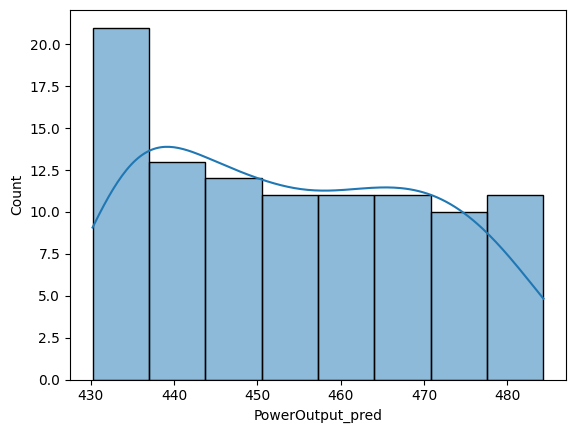

In [63]:
import seaborn as sns
sns.histplot(data=Xnew, x="PowerOutput_pred",kde=True)

In [65]:
Xnew.to_csv("Result2_csv",index=False)